# 1일차 A, B rest_play 군집화

In [270]:
import pandas as pd
import numpy as np

cB_ab=pd.read_csv("D:/Dataset/f_Nirs datasets/1-6 A,B GLM/1st level data/cB.csv")
cB_ab.drop(['Group','Subject'],axis=1,inplace=True)
day1_cB=cB_ab[0:6]
day1_cB.fillna(cB_ab['Ch01'].mean(),inplace=True)


C:\Users\bml05\AppData\Local\Temp\ipykernel_22880\3114346374.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day1_cB.fillna(cB_ab['Ch01'].mean(),inplace=True)


In [271]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


std=StandardScaler()
day1_cB=std.fit_transform(day1_cB)
pca=PCA(n_components=0.95,random_state=1)
day1_pca=pca.fit_transform(day1_cB)
day1_pca=std.fit_transform(day1_pca)
print(day1_pca)

[[-0.8365441  -1.02000326]
 [ 2.1043708  -0.43728987]
 [-0.27916762  1.35527758]
 [ 0.12705265 -0.23325876]
 [-0.8365441  -1.02000326]
 [-0.27916762  1.35527758]]


[[0]
 [1]
 [0]
 [0]
 [0]
 [0]]


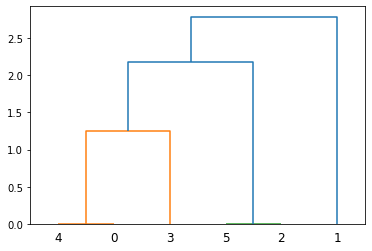

In [272]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

links=linkage(day1_pca,'average')
dendrogram(links,orientation='top',distance_sort='descending',show_leaf_counts=True)
cluster=cut_tree(links,2)
print(cluster)

In [273]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
kmeans=KMeans(n_clusters=2,random_state=3)
kmeans.fit_predict(day1_pca)
kmeans.labels_

array([1, 1, 0, 1, 1, 0])

# 설문조사 클러스터링

In [274]:
self_report=pd.read_csv("D:/Dataset/f_Nirs datasets/k1~12_self-report_dataset.csv")
day1=self_report[0:6]
day1.drop(['subjectkey','date','age','sex','right_handed','piano_year','piano_major','impro_experience','condition','post_C_IF_10','pre_SE_10','pre_SE_11'
           ,'post_C_diff','post_C_SE_10','post_C_SE_11'],axis=1,inplace=True)
for i in range(1,10):
    day1.drop(['pre_SE_0'+str(i)],axis=1,inplace=True)
    day1.drop(['post_C_IF_0'+str(i)],axis=1,inplace=True)
    day1.drop(['post_C_SE_0'+str(i)],axis=1,inplace=True)
day1

C:\Users\bml05\AppData\Local\Temp\ipykernel_22880\131063362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day1.drop(['subjectkey','date','age','sex','right_handed','piano_year','piano_major','impro_experience','condition','post_C_IF_10','pre_SE_10','pre_SE_11'
C:\Users\bml05\AppData\Local\Temp\ipykernel_22880\131063362.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day1.drop(['pre_SE_0'+str(i)],axis=1,inplace=True)
C:\Users\bml05\AppData\Local\Temp\ipykernel_22880\131063362.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

,post_A_SE_01,post_A_SE_02,post_A_SE_03,post_A_SE_04,post_A_SE_05,post_A_SE_06,post_A_SE_07,post_A_SE_08,post_A_SE_09,post_A_SE_10,...,post_B_IF_02,post_B_IF_03,post_B_IF_04,post_B_IF_05,post_B_IF_06,post_B_IF_07,post_B_IF_08,post_B_IF_09,post_B_IF_10,post_B_diff
0,3,4,4,5,3,4,3,4,5,5,...,2,2,2,2,2,2,3,2,1,4
1,3,4,5,5,3,3,3,5,4,4,...,4,4,3,4,4,4,4,3,3,3
2,4,4,4,5,3,4,3,4,4,4,...,4,4,3,4,4,4,5,4,3,2
3,3,4,4,4,3,4,3,4,5,5,...,4,5,4,4,4,4,4,3,3,4
4,4,5,4,5,4,3,3,3,5,5,...,2,3,3,5,4,4,2,2,2,2
5,3,4,4,5,3,3,2,4,5,4,...,3,3,3,3,3,3,3,3,3,4


[[ 1.79211725  0.22403575  1.09528013 -0.60981244  0.40818375]
 [ 0.20841048 -1.11588634 -1.08963011 -0.96135592 -1.26485721]
 [-0.91889348 -0.63434196 -0.26731169 -0.54162399  1.84076967]
 [-1.22957665 -0.13902658  1.6128709   0.27692833 -0.88925308]
 [-0.36060525  2.03602349 -0.79260119 -0.23286758 -0.2052516 ]
 [ 0.50854766 -0.37080437 -0.55860804  2.0687316   0.11040847]]


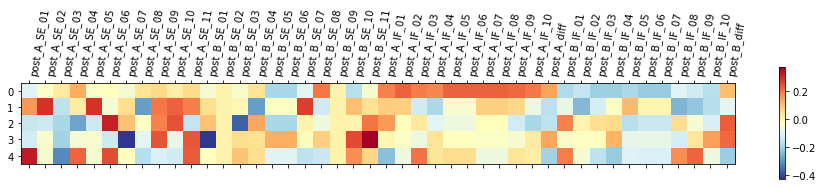

In [275]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

std=StandardScaler()
day1_std=std.fit_transform(day1)
pca=PCA(n_components=0.95,random_state=1)
day1_pca=pca.fit_transform(day1_std)
plt.matshow(pca.components_,cmap='RdYlBu_r')
plt.xticks(range(len(day1.columns)),day1.columns,rotation=80,ha='left')
plt.colorbar()
day1_pca=std.fit_transform(day1_pca)
print(day1_pca)

In [281]:

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
kmeans=KMeans(n_clusters=2,random_state=3)
kmeans.fit_predict(day1_pca)
print(kmeans.labels_)
for i in range(5):
    print("\nprinciple component difference "+str(i))
    print(kmeans.cluster_centers_[0][i]-kmeans.cluster_centers_[1][i])

[0 0 0 0 0 1]

principle component difference 0
-0.610257191077508

principle component difference 1
0.44496524387015907

principle component difference 2
0.6703296434943977

principle component difference 3
-2.4824779186437147

principle component difference 4
-0.1324901693892993


[[0]
 [1]
 [0]
 [1]
 [0]
 [0]]


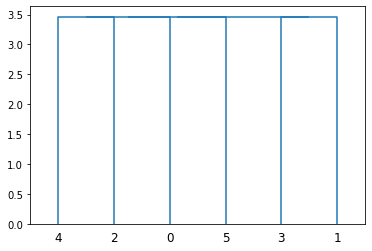

In [277]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

links=linkage(day1_pca,'average')
dendrogram(links,orientation='top',distance_sort='descending',show_leaf_counts=True)
cluster=cut_tree(links,2)
print(cluster)